# Regressions

## Setup

In [1]:
import numpy as np
from datetime import datetime
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy.polynomial.polynomial as poly
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import requests
import bokeh.plotting as bk
from bokeh.models import HoverTool, Label, BoxZoomTool, PanTool, ZoomInTool, ZoomOutTool, ResetTool
from pandas.plotting._converter import DatetimeConverter

company_symbol = 'AAPL'

## Request To API

In [2]:
res = requests.get(f'https://api.iextrading.com/1.0/stock/{company_symbol}/chart/5y')
data = res.json()
df = pd.DataFrame(data)
df.head(5)


,change,changeOverTime,changePercent,close,date,high,label,low,open,unadjustedVolume,volume,vwap
0,2.762500,0.000000,3.838,74.7447,2013-12-23,74.8273,"Dec 23, 13",73.7837,74.4707,17903833,125326831,74.4027
1,-0.317288,-0.004244,-0.424,74.4275,2013-12-24,74.9794,"Dec 24, 13",74.2124,74.7185,5984105,41888735,74.5717
2,-0.494284,-0.010857,-0.664,73.9332,2013-12-26,74.6674,"Dec 26, 13",73.8645,74.4838,7286005,51002035,74.1287
3,-0.499533,-0.017541,-0.676,73.4336,2013-12-27,74.0000,"Dec 27, 13",73.3563,73.9227,8067331,56471317,73.5374
4,-0.730286,-0.027310,-0.994,72.7034,2013-12-30,73.4336,"Dec 30, 13",72.4150,73.0888,9058246,63407722,72.7190


## Describe DataFrame

In [3]:
df.describe()

,change,changeOverTime,changePercent,close,high,low,open,unadjustedVolume,volume,vwap
count,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03,1.258000e+03,1258.000000
mean,0.067447,0.690339,0.073155,126.343863,127.408138,125.237502,126.332103,3.702103e+07,4.300250e+07,126.373892
std,2.019801,0.525433,1.498442,39.273352,39.644786,38.910179,39.288505,2.051530e+07,2.371054e+07,39.262366
min,-14.688700,-0.123328,-7.993000,65.526600,65.755800,64.709600,64.923300,5.704942e+06,1.147592e+07,57.582200
25%,-0.715038,0.291868,-0.616000,96.560275,97.511550,95.705975,96.373450,2.360659e+07,2.660238e+07,96.463875
50%,0.065235,0.514333,0.057000,113.188350,113.881300,112.638850,113.156450,3.317755e+07,3.703142e+07,113.218900
75%,1.014775,1.076895,0.849250,155.236900,157.058900,153.892975,155.519525,4.647701e+07,5.240115e+07,156.037300
max,11.132000,2.094040,8.198000,231.263100,232.658200,228.981100,229.977600,1.898463e+08,2.668336e+08,231.426900


## Info of DataFrame

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 12 columns):
change              1258 non-null float64
changeOverTime      1258 non-null float64
changePercent       1258 non-null float64
close               1258 non-null float64
date                1258 non-null object
high                1258 non-null float64
label               1258 non-null object
low                 1258 non-null float64
open                1258 non-null float64
unadjustedVolume    1258 non-null int64
volume              1258 non-null int64
vwap                1258 non-null float64
dtypes: float64(8), int64(2), object(2)
memory usage: 118.0+ KB


## Datetime of DataFrame

In [5]:
# Original Version:
# df['date_pd'] = pd.to_datetime(df.date)

# Updated Version:
df['date_pd'] = pd.to_datetime(df['date'])


df['date'] = pd.to_datetime(df['date'])

In [6]:
df.head(3)

,change,changeOverTime,changePercent,close,date,high,label,low,open,unadjustedVolume,volume,vwap,date_pd
0,2.762500,0.000000,3.838,74.7447,2013-12-23,74.8273,"Dec 23, 13",73.7837,74.4707,17903833,125326831,74.4027,2013-12-23
1,-0.317288,-0.004244,-0.424,74.4275,2013-12-24,74.9794,"Dec 24, 13",74.2124,74.7185,5984105,41888735,74.5717,2013-12-24
2,-0.494284,-0.010857,-0.664,73.9332,2013-12-26,74.6674,"Dec 26, 13",73.8645,74.4838,7286005,51002035,74.1287,2013-12-26


In [7]:
df['year'] = df.date_pd.dt.year
df.head(3)

,change,changeOverTime,changePercent,close,date,high,label,low,open,unadjustedVolume,volume,vwap,date_pd,year
0,2.762500,0.000000,3.838,74.7447,2013-12-23,74.8273,"Dec 23, 13",73.7837,74.4707,17903833,125326831,74.4027,2013-12-23,2013
1,-0.317288,-0.004244,-0.424,74.4275,2013-12-24,74.9794,"Dec 24, 13",74.2124,74.7185,5984105,41888735,74.5717,2013-12-24,2013
2,-0.494284,-0.010857,-0.664,73.9332,2013-12-26,74.6674,"Dec 26, 13",73.8645,74.4838,7286005,51002035,74.1287,2013-12-26,2013


## Regression Model

In [8]:
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = [5, 3]

## Split Data Into Train & Test Data

In [9]:
# TO PASS IN DATA
X_full, Y_full = df.date_pd, df.close

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X_full, Y_full, test_size=0.5, random_state=10)

Text(0.5, 1.0, 'Actual Stock Price')

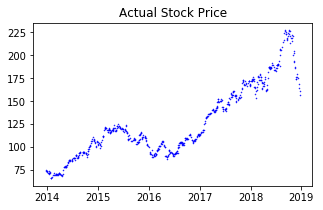

In [11]:
plt.plot(X_train, Y_train, 'bo', markersize=0.5)
plt.title('Actual Stock Price')

Text(0.5, 1.0, 'Test Set')

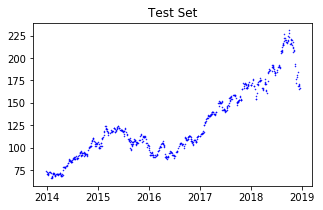

In [12]:
plt.plot(X_test, Y_test, 'bo', markersize=0.5)
plt.title('Test Set')

## Fit Training Data Into Regression

In [13]:
# Original conversion:
# X_full_numpy = [matplotlib.dates.date2num(x) for x in X_full]

# Updated conversion:
X_years = [matplotlib.dates.date2num(x) for x in X_train]

# Skip re-splitting the data

In [14]:
coefs_lin = poly.polyfit(X_years, Y_train, 1)
coefs_sq = poly.polyfit(X_years, Y_train, 2)
coefs_ten = poly.polyfit(X_years, Y_train, 11)


/Users/joyceliao/.local/share/virtualenvs/data_analysis-2Dzdq7Jq/lib/python3.7/site-packages/ipykernel_launcher.py:3: RankWarning: The fit may be poorly conditioned
  This is separate from the ipykernel package so we can avoid doing imports until


In [15]:
X_line = np.linspace(matplotlib.dates.date2num(X_train.min()), matplotlib.dates.date2num(X_train.max()), 10000)

# X_line = np.linspace(X_years.min(), X_years.max(), 10000)

ffit_ln = poly.polyval(X_line, coefs_lin)
ffit_sq = poly.polyval(X_line, coefs_sq)
ffit_ten = poly.polyval(X_line, coefs_ten)
# X_line?
# matplotlib.dates.date2num(X_train.min())

Text(0.5, 1.0, '5-Year Stock Trend')

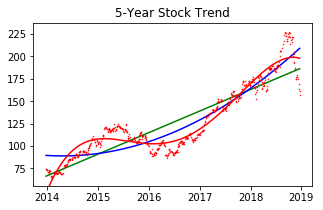

In [16]:
plt.figure(figsize=(5, 3))

# plt.ylim?
plt.ylim(min(Y_train - 10), max(Y_train + 10))
# plt.xlim(min(X_train_numpy), max(X_train_numpy), 100000)

plt.plot(X_line, ffit_ln, 'g')
plt.plot(X_line, ffit_sq, 'b')
plt.plot(X_line, ffit_ten, 'r')

# X_month = matplotlib.dates.MonthLocator()

plt.plot(X_train, Y_train, 'ro', markersize=0.5)
plt.title('5-Year Stock Trend')

## Regression Fitting Model Conclusion:

In [17]:
print('I think the 11th polyfit best describes the trend of the stock price since the linear and the quadratic both underestimated the fluctuation of the prices.')

I think the 11th polyfit best describes the trend of the stock price since the linear and the quadratic both underestimated the fluctuation of the prices.


## Conclusion (1): 

In [18]:
print(f'The price of stock came in a wave form, but generally follows an upward direction over the years.')

The price of stock came in a wave form, but generally follows an upward direction over the years.


## Conclusion (2):

In [19]:
highest = df.sort_values(by=['close']).tail(1)
highest

,change,changeOverTime,changePercent,close,date,high,label,low,open,unadjustedVolume,volume,vwap,date_pd,year
1203,2.7803,2.09404,1.217,231.2631,2018-10-03,232.6582,"Oct 3, 18",228.9811,229.2501,28654799,28654799,231.4269,2018-10-03,2018


In [20]:
print(f'The highest point of the stock price during the 5 years was $231.')

The highest point of the stock price during the 5 years was $231.


## Conclusion (3): 

In [21]:
lowest = df.sort_values(by=['close']).head(1)
lowest

,change,changeOverTime,changePercent,close,date,high,label,low,open,unadjustedVolume,volume,vwap,date_pd,year
25,-0.126916,-0.123328,-0.193,65.5266,2014-01-30,66.4074,"Jan 30, 14",65.1226,65.8882,24251827,169762789,71.9614,2014-01-30,2014


In [22]:
print(f'The lowest point of the stock price during the 5 years was $66.')

The lowest point of the stock price during the 5 years was $66.
